# 🛡️ Credit Card Fraud Detection Project
---

Welcome to the **Credit Card Fraud Detection** notebook!
In this project, we analyze and model credit card transaction data to identify fraudulent activities using machine learning.

**Goals:**
- Explore and visualize the dataset
- Handle class imbalance
- Train and evaluate a classification model
- Identify important features for fraud detection


## 📦 Importing Required Libraries

We use popular Python libraries for data analysis, visualization, and machine learning.

In [ ]:
# Import essential libraries for data manipulation, visualization, and modeling
import numpy as np  # Numerical operations
import pandas as pd  # Data manipulation
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.linear_model import LogisticRegression  # ML model
from sklearn.metrics import accuracy_score  # Model evaluation
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Advanced visualization

## 📂 Loading the Dataset

Let's load the credit card transaction data from the CSV file.

In [ ]:
# Load the dataset into a pandas DataFrame
credit_card_data = pd.read_csv('creditcard.csv')

### 👀 Preview the Dataset

Take a look at the first and last few rows to understand the structure of the data.

In [ ]:
# Uncomment to preview the data
# credit_card_data.head()
# credit_card_data.tail()

### ℹ️ Dataset Information

Check the data types and missing values in the dataset.

In [ ]:
# Uncomment to display dataset info
# credit_card_data.info()

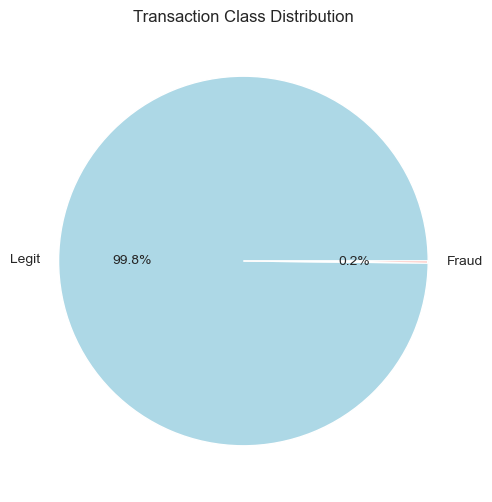

In [ ]:
# Visualize the distribution of transaction classes (Legit vs Fraud)_
plt.figure(figsize=(8,6))
credit_card_data['Class'].value_counts().plot.pie(autopct='%1.1f%%',colors=['lightblue','salmon'],labels=["Legit","Fraud"])
plt.title("Transaction Class Distribution")
plt.ylabel('')
plt.show()

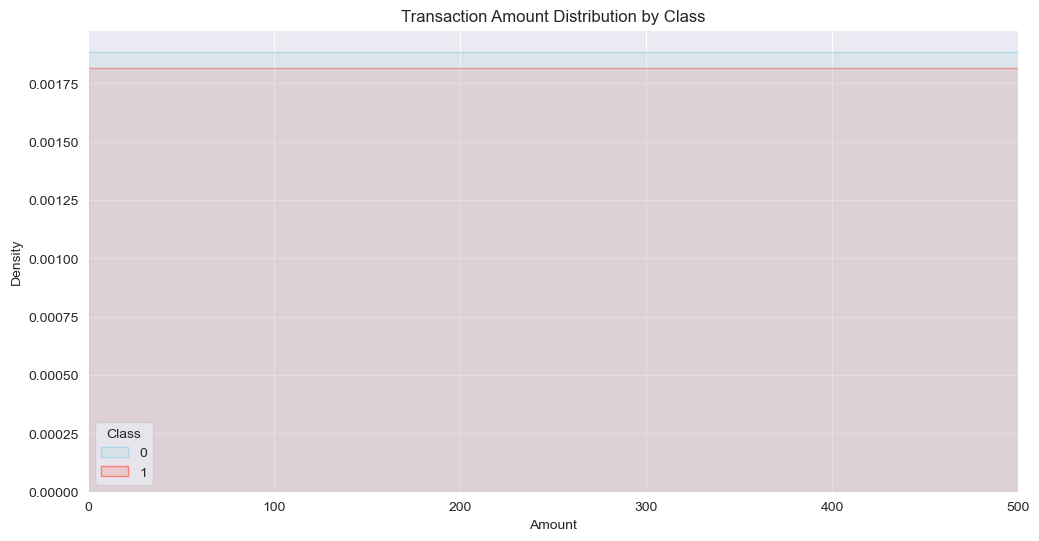

In [ ]:
# Visualize transaction amount distribution by class
plt.figure(figsize=(12,6))
sns.histplot(data=credit_card_data, x='Amount', hue='Class',bins=50,element='step',stat='density',common_norm=False,palette=['lightblue','salmon'])
plt.title("Transaction Amount Distribution by Class")
plt.xlim(0,500)
plt.show()

In [ ]:
# Check for missing values in the dataset
credit_card_data.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 📊 Distribution of Legit and Fraudulent Transactions

Let's see how many transactions are legitimate and how many are fraudulent.

In [ ]:
# Count the number of legit and fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

> **Note:** The dataset is highly imbalanced.

- `0` → Normal Transaction
- `1` → Fraudulent Transaction

In [ ]:
# Separate the data for further analysis
legit = credit_card_data[credit_card_data['Class'] == 0]
fraud = credit_card_data[credit_card_data['Class'] == 1]
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
# Statistical summary of legit transactions
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
# Statistical summary of fraudulent transactions
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
# Compare mean values for both transaction types
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


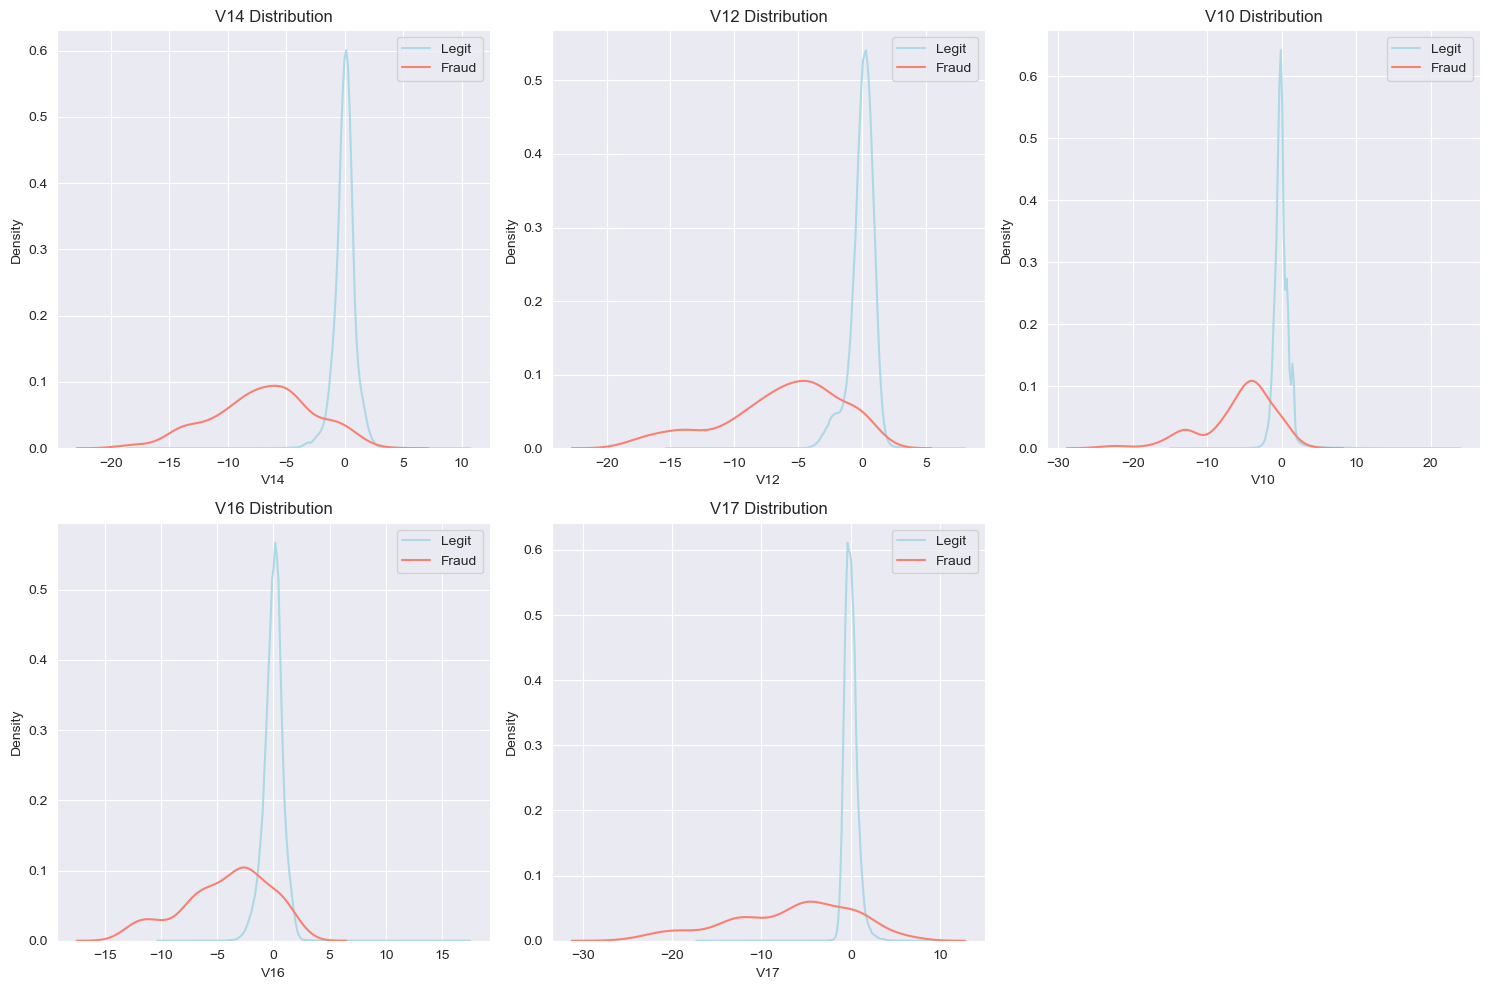

In [ ]:
# Visualize feature distributions for legit vs fraud transactions
plt.figure(figsize=(15,10))
features_to_compare = ['V14','V12','V10','V16','V17']
for i, col in enumerate(features_to_compare):
    plt.subplot(2,3,i+1)
    sns.kdeplot(legit[col],label='Legit',color='lightblue')
    sns.kdeplot(fraud[col],label='Fraud',color='salmon')
    plt.title(f'{col} Distribution')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Under-sample legit transactions to balance the dataset
legit_sample = legit.sample(n=492)

In [ ]:
# Combine the sampled legit transactions with all fraud cases
new_dataset = pd.concat([legit_sample,fraud],axis=0)

In [ ]:
# Preview the new balanced dataset
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
30361,35887.0,0.137189,-3.168221,0.097197,-2.116149,-2.225973,0.114559,-0.399724,0.059428,1.316656,...,-0.078996,-0.688992,-0.477739,0.037433,0.174733,-0.887470,0.035518,0.126513,602.26,0
190239,128750.0,-2.608490,-1.679881,0.811057,0.093623,0.942956,-0.759330,-0.824826,0.822160,0.028462,...,0.581450,0.689316,0.038158,0.777709,0.042208,-0.213716,0.264052,-0.198031,126.51,0
52720,45606.0,-1.164176,1.470887,1.351617,-0.255280,-0.252816,-0.761746,0.545394,0.115030,-0.056354,...,-0.256120,-0.532448,0.032126,0.497435,-0.103072,0.055529,0.567205,0.316246,2.97,0
21484,31700.0,1.354663,-1.016265,0.199255,-1.159121,-0.611341,1.015331,-1.322242,0.421636,-0.283645,...,0.344305,0.810161,-0.303031,-1.713388,0.485674,0.073116,0.031404,-0.004145,39.90,0
254884,156962.0,-4.041363,3.696489,-1.748376,-1.780017,-0.555113,-0.015778,-0.671251,1.224816,2.291957,...,-0.415956,-0.970186,0.068165,-1.568831,0.484550,-0.243842,-0.044264,0.279079,0.77,0


In [ ]:
# Check the class distribution in the new dataset
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [ ]:
# Compare mean values in the balanced dataset
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94304.416667,0.113416,0.054030,0.070828,-0.004423,-0.002054,0.171299,-0.033340,0.048980,0.031145,...,-0.011009,-0.004578,0.051473,0.011310,-0.001033,-0.016838,-0.011280,-0.010208,0.000686,77.198537
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


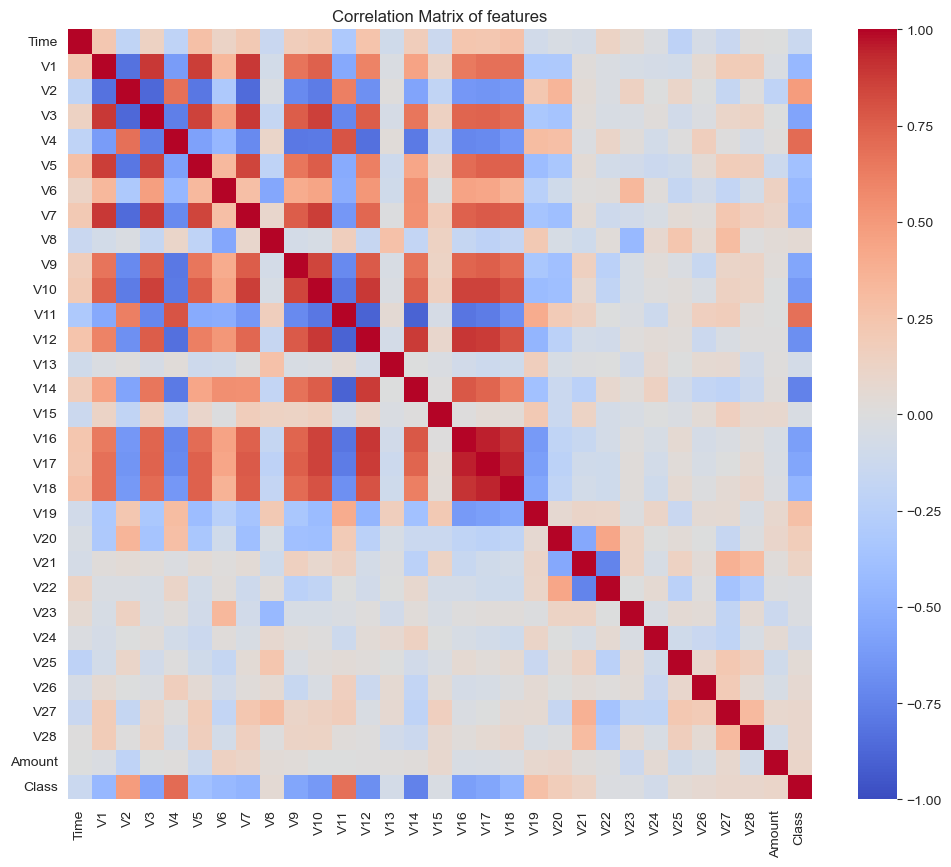

In [ ]:
# Correlation matrix heatmap for feature relationships
plt.figure(figsize=(12,10))
corr_matrix = new_dataset.corr()
sns.heatmap(corr_matrix,cmap='coolwarm',center=0,vmin=-1,vmax=1)
plt.title('Correlation Matrix of features')
plt.show()

In [ ]:
# Split features and target variable
X= new_dataset.drop(columns='Class',axis=1)
Y= new_dataset['Class']
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
30361    35887.0  0.137189 -3.168221  0.097197 -2.116149 -2.225973  0.114559   
190239  128750.0 -2.608490 -1.679881  0.811057  0.093623  0.942956 -0.759330   
52720    45606.0 -1.164176  1.470887  1.351617 -0.255280 -0.252816 -0.761746   
21484    31700.0  1.354663 -1.016265  0.199255 -1.159121 -0.611341  1.015331   
254884  156962.0 -4.041363  3.696489 -1.748376 -1.780017 -0.555113 -0.015778   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
# Display target variable values
print(Y)

30361     0
190239    0
52720     0
21484     0
254884    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [ ]:
# Split the data into training and test sets
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y,random_state=2)
print(X_train.shape, X_test.shape)

(787, 30) (197, 30)


In [ ]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Evaluate accuracy on training data
X_train_prediction = model.predict(X_train)
training_accuracy = accuracy_score(X_train_prediction,Y_train)
print("Training data Accuracy: ", training_accuracy)

Training data Accuracy:  0.9555273189326556


In [ ]:
# Evaluate accuracy on test data
X_test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(X_test_prediction,Y_test)
print("Test data Accuracy: ", test_accuracy)

Test data Accuracy:  0.9390862944162437


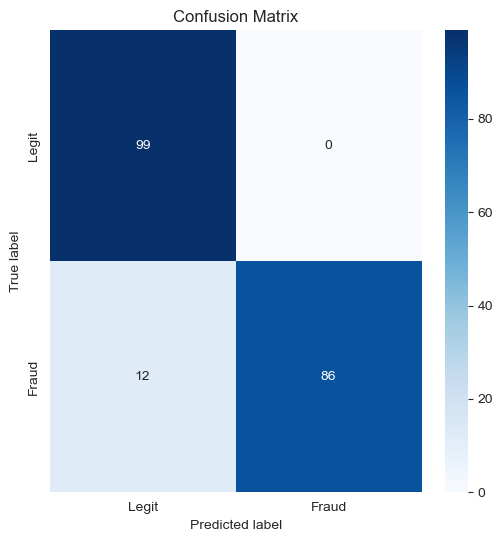

In [ ]:
# Plot the confusion matrix for predictions
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,X_test_prediction)
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Legit','Fraud'], yticklabels=['Legit','Fraud'])
plt.title('Confusion Matrix')
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

C:\Users\ethan\AppData\Local\Temp\ipykernel_31420\1248566946.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature', palette='viridis')


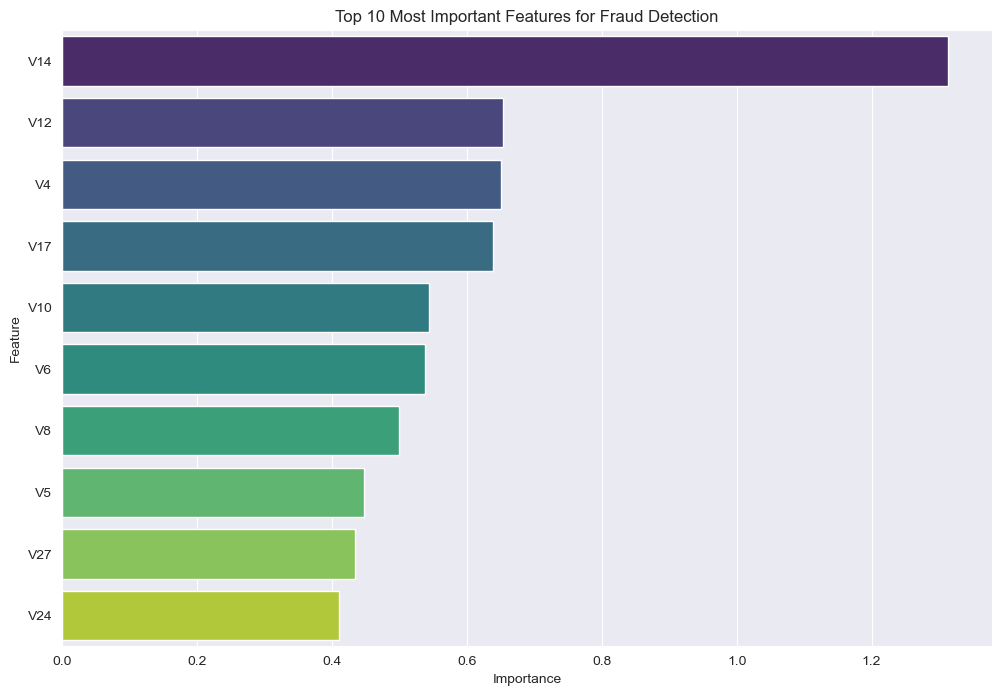

In [ ]:
# Feature importance analysis for fraud detection
importance = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': abs(importance)})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Most Important Features for Fraud Detection')
plt.show()

---

## 🎉 Project Summary

- We explored and visualized the credit card transaction dataset.
- Addressed class imbalance using under-sampling.
- Built and evaluated a logistic regression model for fraud detection.
- Identified the most important features for predicting fraudulent transactions.

**Thank you for exploring this project!** 🚀